## Hierarchical Clustering Animation

✔ Agglomerative merging

✔ Dendrogram growing step-by-step

✔ Clusters merging over time

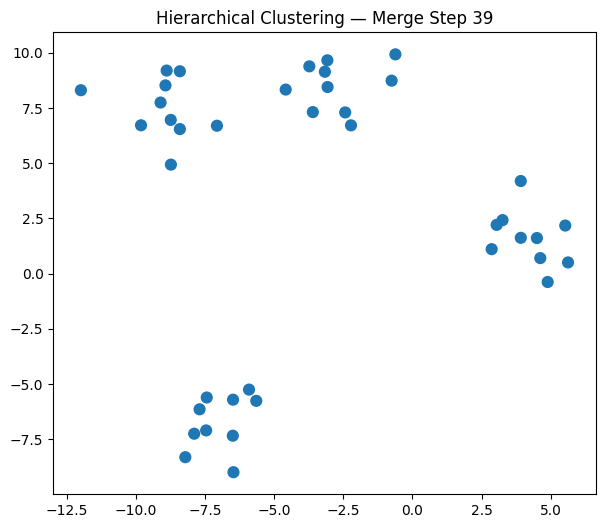

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

# Create GIF folder
os.makedirs("gifs", exist_ok=True)

# Generate dataset
X, _ = make_blobs(
    n_samples=40, centers=4,
    cluster_std=1.2, random_state=42
)

N = len(X)
clusters = [[i] for i in range(N)]  # each point starts alone

# Create enough distinct colors for all possible clusters
colors = plt.cm.tab20(np.linspace(0, 1, 20))
# Repeat colors so 40+ labels never overflow
colors = np.vstack([colors] * 20)   # Now 400 colors available


# Helper functions
def cluster_centroid(indices):
    return np.mean(X[indices], axis=0)

def cluster_distance(c1, c2):
    return np.mean(cdist(X[c1], X[c2]))


# Build merge history
history = []

while len(clusters) > 1:
    min_dist = float("inf")
    merge_pair = None

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            d = cluster_distance(clusters[i], clusters[j])
            if d < min_dist:
                min_dist = d
                merge_pair = (i, j)

    i, j = merge_pair
    new_cluster = clusters[i] + clusters[j]

    # Rebuild cluster list
    updated = []
    for idx, c in enumerate(clusters):
        if idx not in (i, j):
            updated.append(c)
    updated.append(new_cluster)

    clusters = updated

    # Build label map
    label_map = {}
    for cid, cluster_indices in enumerate(clusters):
        for idx in cluster_indices:
            label_map[idx] = cid
    labels = [label_map[k] for k in range(N)]
    history.append(labels)


# --- ANIMATION ---
fig, ax = plt.subplots(figsize=(7, 6))
scatter = ax.scatter([], [], s=60)

def update(i):
    labels = history[i]

    scatter.set_offsets(X)
    scatter.set_color([colors[l] for l in labels])

    ax.set_title(f"Hierarchical Clustering — Merge Step {i+1}")
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    return scatter,

ani = FuncAnimation(fig, update, frames=len(history), interval=800)

# Save GIF
ani.save("gifs/hierarchical_clustering.gif", writer="pillow")

plt.show()
